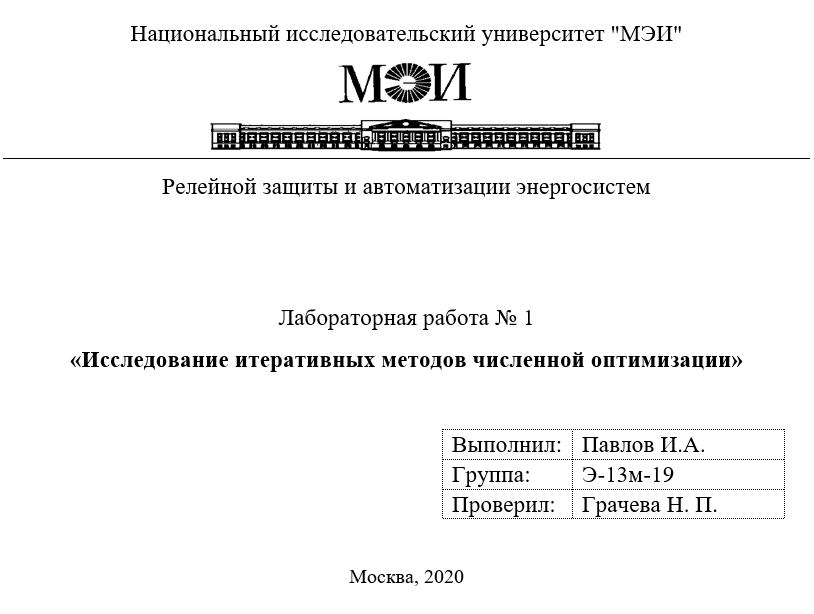

## Импорт библиотек необходимых для работы

In [1]:
from sympy import *
import random
import math
import plotly.graph_objects as go
import numpy as np
%matplotlib inline

## Вспомогательные функции расчета

### Вычисление значения функции

In [3]:
def Function(X, Y):
    F = -0.5 * (X ** 2 + Y ** 2) * (
                1.6 + 0.8 * cos(1.5 * X) * cos(3.14 * Y) + 0.8 * cos(math.sqrt(5) * X) * cos(3.5 * Y))
    return float(F)

### Производная по Х

In [4]:
def DiffFx(Xd, Yd):
    X, Y = symbols('x y')
    F = 0.5 * (X ** 2 + Y ** 2) * (
            1.6 + 0.8 * cos(1.5 * X) * cos(3.14 * Y) + 0.8 * cos(math.sqrt(5) * X) * cos(3.5 * Y))
    Dfx = diff(F, X)
    Fx = Dfx.subs([(X, Xd),(Y, Yd)])
    return Fx

### Производная по У

In [ ]:
def DiffFy(Xd, Yd):
    X, Y = symbols('x y')
    F = 0.5 * (X ** 2 + Y ** 2) * (
            1.6 + 0.8 * cos(1.5 * X) * cos(3.14 * Y) + 0.8 * cos(math.sqrt(5) * X) * cos(3.5 * Y))
    Dfy = diff(F, Y)
    Fy = Dfy.subs([(X, Xd),(Y, Yd)])
    return Fy

## Функция градиентного метода
### На вход поступают: значения Х и У, шаг, и количество повторов(для выхода из локального минимума) и находятся значения функции и производной

In [9]:
def Grad(Xd, Yd, a, count):
    F = Function(Xd, Yd)
    Fx = DiffFx(Xd, Yd)
    Fy = DiffFy(Xd, Yd)
    
    # Ветвление по точности. Если точность достигается выходим из рекурсии, если нет продолжаем до достижения точности
    if math.fabs(Fx) < 0.0005 and math.fabs(Fy) < 0.0005:
        print("Решение:\nX = " + str(Xd) + "; Y = " + str(Yd))
        print("Значение функции: \nF = " + str(F))
        return Xd, Yd
    else:
        # Выбор нового значения Х и У, с использованием производной функции
        Xd_new = Xd - a * Fx
        Yd_new = Yd - a * Fy
        
        # Если новое значение функции больше предыдущего, то не переходим в это значение и уменьшаем шаг. 
        if Function(Xd_new, Yd_new) > Function(Xd, Yd):
            Xd_new = Xd
            Yd_new = Yd
            a = a / 2
            count = 0 # При переходе в новое значение счетчик обнуляется.
        # Если новое значение равно старому до 5го знако после запятой, то значит мы в локальном минимуме и запускается счетчикю
        elif round(Function(Xd_new, Yd_new), 5) == round(Function(Xd, Yd), 5):
            count += 1
            # Если за 3 итерации не выходим из минимума, то выбрасываем насильно
            if count == 3:
                Xd_new = random.uniform(-2.5, 2.5)
                Yd_new = random.uniform(-2.5, 2.5)
                a = 1
        # print("Промежуточное решение:\nX = " + str(Xd_new) + "; Y = " + str(Yd_new) + "; a = " + str(a))
        # print("Функция: " + str(Function(Xd_new, Yd_new)))
        # Рекурсия
        return Grad(Xd_new, Yd_new, a, count)

## Функция метода имитации ожига
### На вход поступают: значения Х и У, минимальная температура, начальная температура

In [ ]:
def Ozig(X, Y, Tmin, T):
    # Определяем значение функции
    F = Function(X, Y)
    # Проверка достижения минимальной температуры. Если больше минимальной, то считаем, если меньше, выходим. 
    if T > Tmin:
        # Генерация нового значения переменных
        X_new = X + random.uniform(-1, 1)
        Y_new = Y + random.uniform(-1, 1)
        # Ограничение изменения переменных по области определения функции
        if (X_new > 2.5 or X_new < -2.5) or (Y_new > 2.5 or Y_new < -2.5):
            return Ozig(X, Y, Tmin, T)
        else:
            # Определяем новое значение функции и находим разность новой и стартовой
            F_new = Function(X_new,Y_new)
            delE = F_new - F
            # Если разность меньше 0, то переходим в новое значение функции
            if delE < 0:
                F = F_new
                X = X_new
                Y = Y_new
            # Если нет, то находим вероятность перехода
            else :
                P = math.exp(-delE / T)
                randValue = 0.95
                # Если вероятность перехода больше заданной, то переходим в новое состояние
                if P > randValue:
                    F = F_new
                    X = X_new
                    Y = Y_new
            # Изменяем температуру
            T = T * 0.95
            # print("Промежуточное решение:\nX = " + str(X) + "; Y = " + str(Y) + "; T = " + str(T))
            # print("Функция: " + str(F))
            return Ozig(X, Y, Tmin, T)
    # Если минимальная температура достигнута, то выходим из рекурсии
    else:
        print("Решение:\nX = " + str(X) + "; Y = " + str(Y))
        print("Значение функции: \nF = " + str(F))
        return X, Y

### Зададим начальные значения всем переменным

In [ ]:
X_start = random.uniform(-2.5, 2.5)
Y_start = random.uniform(-2.5, 2.5)
Tmin = 0.0001
Tmax = 10000
a = 1

### Реализуем простенький интерфейс выбора метода

In [ ]:
GradSpusk = "1. Градиентный спуск"
Oziga = "2. Ожиг"
print("Выберите метод: " "\n\t" + GradSpusk +"\n\t"+ Oziga)
Metod = input('Номер метода: ')
if Metod == "1":
    print("Начало:\nX = " + str(X_start) + "; Y = " + str(Y_start) + "; a = " + str(a))
    X_min, Y_min = Grad(X_start, Y_start, a, 0) # Значения использующиеся в построении графика
elif Metod == "2":
    print("Начало:\nX = " + str(X_start) + "; Y = " + str(Y_start) + "; T = " + str(Tmax))
    X_min, Y_min = Ozig(X_start, Y_start, Tmin, Tmax) # Значения использующиеся в построении графика

### Блок для построения графика 

In [ ]:
xs = np.arange(-2.5, 2.5, 0.1)
ys = np.arange(-2.5, 2.5, 0.1)

def XYZcreator(xs, ys):
    X, Y = np.meshgrid(xs,ys)
    Z = 0.5 * (X * X + Y * Y) * (1.6 + 0.8 * np.cos(1.5 * X) * np.cos(3.14 * Y) +
                                             0.8 * np.cos(np.sqrt(5) * X) * np.cos(3.5 * Y))
    if (xs.shape == (1,) and ys.shape == (1,)):
        return Z[0]
    else:
        return X, Y, Z


X, Y, Z = XYZcreator(xs, ys)

x_dot = np.array([float(X_min)])
y_dot = np.array([float(Y_min)])
z_dot = XYZcreator(x_dot, y_dot)

# Блок для поверхности
surface = go.Surface(
    opacity=0.75,
    x=X,
    y=Y,
    z=Z,
    )
# Блок для точки
dot = go.Scatter3d(
    x=x_dot,
    y=y_dot,
    z=z_dot,
    mode='markers',
    marker=dict(
        size=3,
        line=dict(
            color='rgb(111, 203, 1)',
            width=0.5)
    )
)
data = [surface, dot]
layout = go.Layout(title='My func and dot', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig = go.Figure(data=data, layout=layout)

fig.show()

## Результаты

### Градиентный метод

Решение:
X = -2.09106871748435e-5; Y = 5.34857929879825e-5
Значение функции: 
F = 5.276778979673708e-09

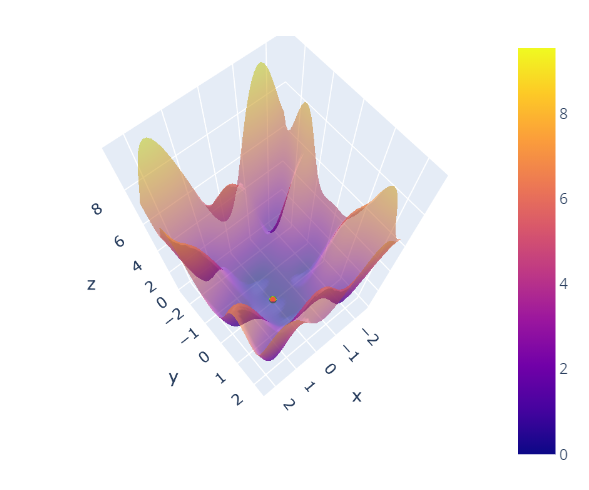

#### Приблизим

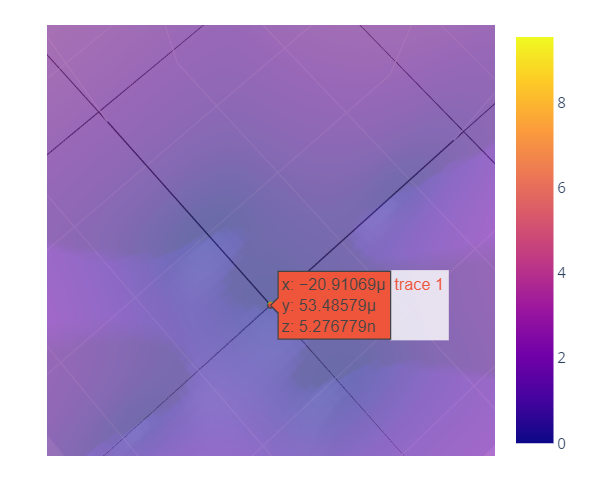

### Метод имитации ожига

In [ ]:
Решение:
X = -0.04504587481943534; Y = 0.02962329319578738
Значение функции: 
F = 0.004630899680638391

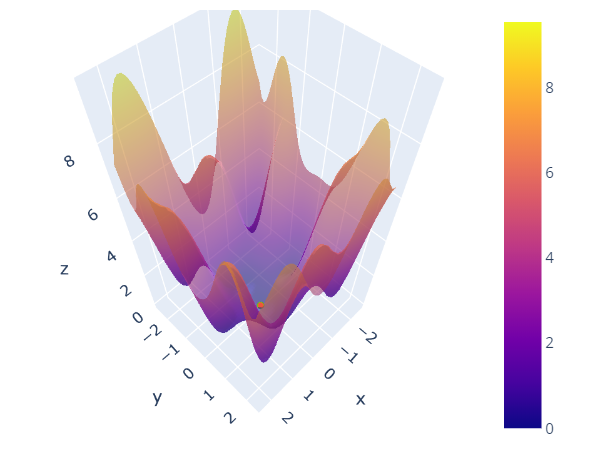

#### Приблизим

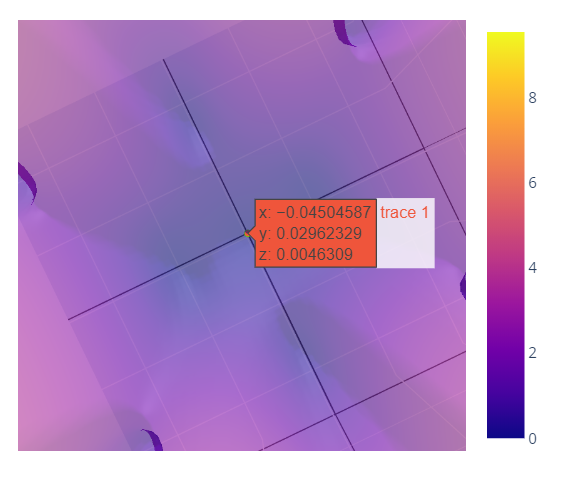